In [1]:
import sys
import os
sys.path.append('/Users/sam/All-Program/App/ObjectDetection/')

import numpy as np
from scipy import ndimage
from scipy import misc
from MaskRCNN.building_blocks import preprocess


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/images/3627527276_6fe8cd9bfe_z.jpg'

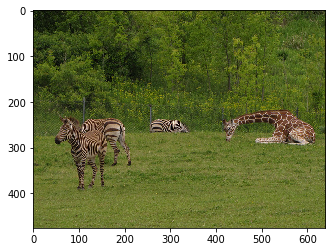

In [3]:
image = ndimage.imread(img_path, mode='RGB')
plt.imshow(np.array(image, dtype='uint8'))

## Preprocess Fetch Data

(476, 640, 3)
1.680672268907563
1.680672268907563
1.6
(1024, 1024, 3)
(1, 1024, 1024, 3)
(1, 13)
(1, 4)


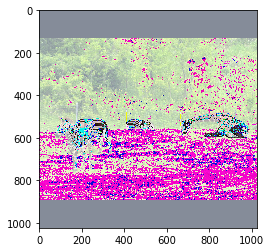

In [4]:
image_id = os.path.basename(img_path).split('.')[0]
transformed_images, image_metas, img_windows  = preprocess.process_images([image], [image_id])
print (transformed_images.shape)
print (image_metas.shape)
print (img_windows.shape)
plt.imshow(np.array(transformed_images[0], dtype='uint8'))

## RUN THE FPN Graph and collect output feature maps

In [7]:
import tensorflow as tf
import numpy as np
from MaskRCNN.building_blocks.main import inference

def main(pretrained_weights_path):
    print('')
    inference_graph = inference()
    
    feed_dict = {inference_graph['xIN']: transformed_images}
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)

        # Note setting the weight can take 1-2 min due to the deep network
        # load_params.set_pretrained_weights(sess, pretrained_weights_path)
        
        c2, c3, c4, c5, p2, p3, p4, p5 = sess.run([inference_graph['fpn_C2'], inference_graph['fpn_C3'],
                                                    inference_graph['fpn_C4'], inference_graph['fpn_C5'],
                                                    inference_graph['fpn_P2'], inference_graph['fpn_P3'],
                                                    inference_graph['fpn_P4'], inference_graph['fpn_P5']
                                                  ], feed_dict=feed_dict)
        
        print(c2.shape, c3.shape, c4.shape, c5.shape, p2.shape, p3.shape, p4.shape, p5.shape)
    return c2, c3, c4, c5, p2, p3, p4, p5

In [8]:
filepath = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/mask_rcnn_coco.h5'
fmap_c2, fmap_c3, fmap_c4, fmap_c5, fmap_p2, fmap_p3, fmap_p4, fmap_p5 = main(filepath)


(1, 256, 256, 256) (1, 128, 128, 512) (1, 64, 64, 1024) (1, 32, 32, 2048) (1, 256, 256, 256) (1, 128, 128, 256) (1, 64, 64, 256) (1, 32, 32, 256)


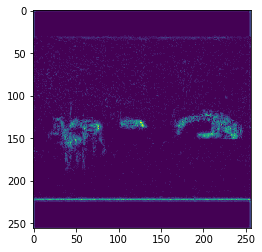

In [19]:
plt.imshow(np.array(fmap_c2[:,:,:,200].reshape(256,256), dtype='uint8'))

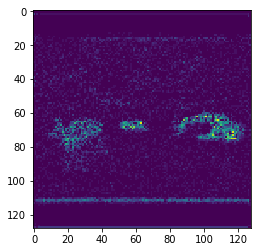

In [23]:
plt.imshow(np.array(fmap_c3[:,:,:,100].reshape(128,128), dtype='uint8'))

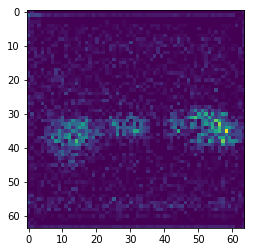

In [24]:
plt.imshow(np.array(fmap_c4[:,:,:,100].reshape(64,64), dtype='uint8'))

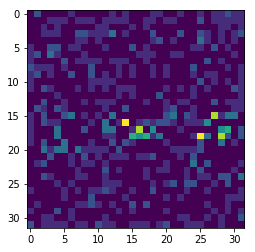

In [26]:
plt.imshow(np.array(fmap_c5[:,:,:,100].reshape(32,32), dtype='uint8'))